In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [174]:
dataset = pd.read_csv("Housing.csv")

In [175]:
# # Identify categorical variables and one-hot encode them
# categorical_columns = dataset.select_dtypes(include=['object']).columns
# dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)


In [176]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [177]:
dataset.shape

(545, 13)

In [178]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [179]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [180]:
# Identify categorical variables and handle 'yes'/'no' variables
yes_no_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea']  # Replace with your column names
for column in yes_no_columns:
    dataset[column] = dataset[column].map({'yes': 1, 'no': 0})


In [181]:
dataset.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

In [182]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [183]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea']]
y = dataset['price']

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [185]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Create Linear regression model
model = LinearRegression()

In [187]:
model.fit(X_train, y_train)

LinearRegression()

In [188]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [189]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1921574834258.5483


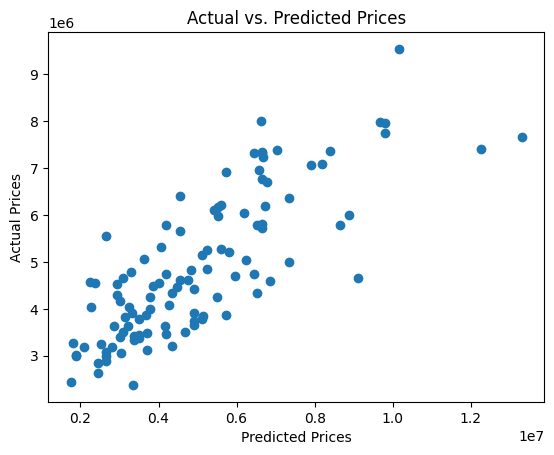

In [192]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

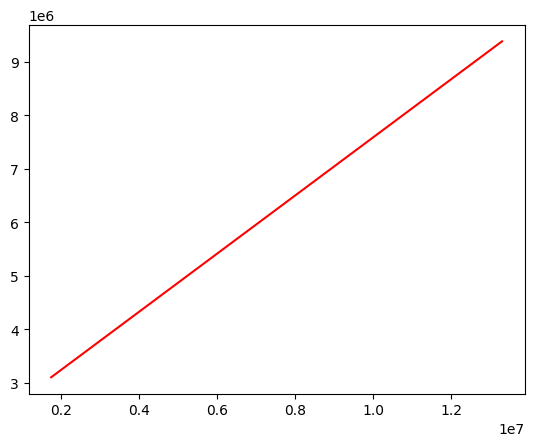

In [191]:
# Add a regression line
sorted_order = np.argsort(y_test)
plt.plot(y_test.iloc[sorted_order], np.poly1d(np.polyfit(y_test, y_pred, 1))(y_test.iloc[sorted_order]), color='red')

plt.show()

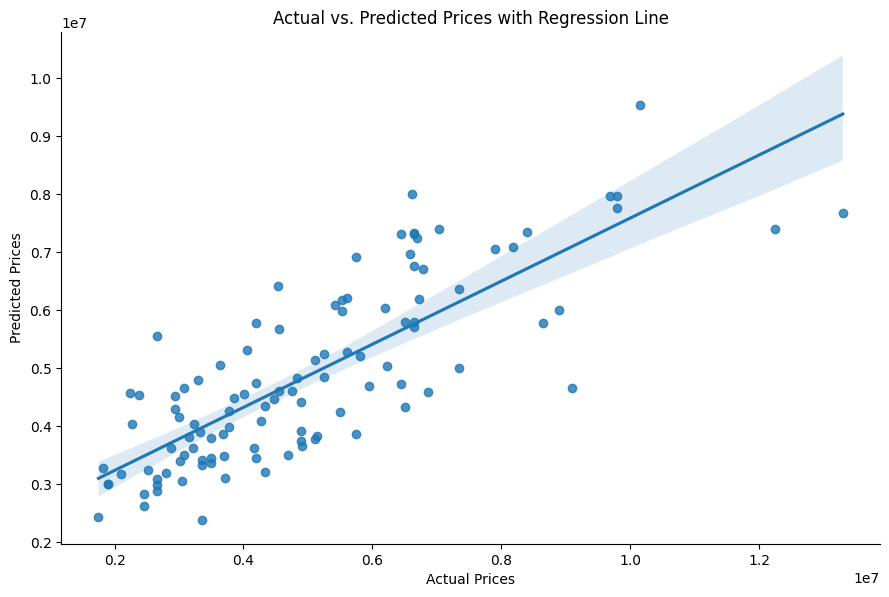

In [193]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Scatter plot with regression line using Seaborn
sns.lmplot(x='Actual Prices', y='Predicted Prices', data=plot_data, height=6, aspect=1.5)
plt.title("Actual vs. Predicted Prices with Regression Line")
plt.show()